# Auditory EEG using Classical ML techiniques
## Speech Understanding Course Minor Project

This notebook demonstrates the usage of this repository.

### Dataset Preparation
Specify the dataset and stimuli directory to initialise the dataset object wrapper.

In [25]:
from src.dataset import Dataset
dataset = Dataset(audio_feat_type="mfcc", eeg_feat_type="spectogram", DATASET_DIR="../dataset/", STIMULI_DIR="../dataset/stimuli/")

In [21]:
# use the method prepare_dataset to generate the dataset
# note that the parameter N_experiments specifies how many full length experiments need to be included in the dataset.
# Each full length experiment contributes 200 sets of feature vectors each set corresponding to a 3 second duration

dataset.prepare_dataset(N=2)

3it [01:13, 24.65s/it]                       

audio size 400
eeg size 400


(array([[-4.79398285e+02,  8.13944778e+01,  4.44239044e+00, ...,
         -1.25822616e+00, -2.07428646e+00, -2.89342260e+00],
        [-4.73252777e+02,  8.60305252e+01,  2.44695830e+00, ...,
         -1.41231024e+00, -1.58537018e+00, -2.94244599e+00],
        [-4.12708160e+02,  1.03004692e+02, -6.16177797e+00, ...,
         -1.35548520e+00, -1.32969987e+00, -3.17452812e+00],
        ...,
        [-3.87471313e+02,  1.01227577e+02, -1.43156233e+01, ...,
          2.07264996e+00,  1.07038271e+00,  1.64165032e+00],
        [-3.78611115e+02,  8.23941879e+01, -2.62436066e+01, ...,
          2.08180404e+00, -4.88689775e-03,  1.93858778e+00],
        [-3.60787506e+02,  9.18777084e+01, -3.57918663e+01, ...,
          3.04518604e+00,  4.60837305e-01,  2.34166574e+00]]),
 array([[ 25.21374321,  13.04426193,   2.60938883, ...,   0.28005055,
           0.25009206,   0.24378264],
        [ 35.43346786,  17.8841877 ,   2.57388043, ...,   0.27227125,
           0.24893899,   0.23551504],
        [ 37.

Below is a visualisation of an EEG sample from the entire dataset. This visualisation is prepared after applying ICA on all the 64 electrode channels. The output is an 8x8 dimensional grid for each of the 64 channels produced

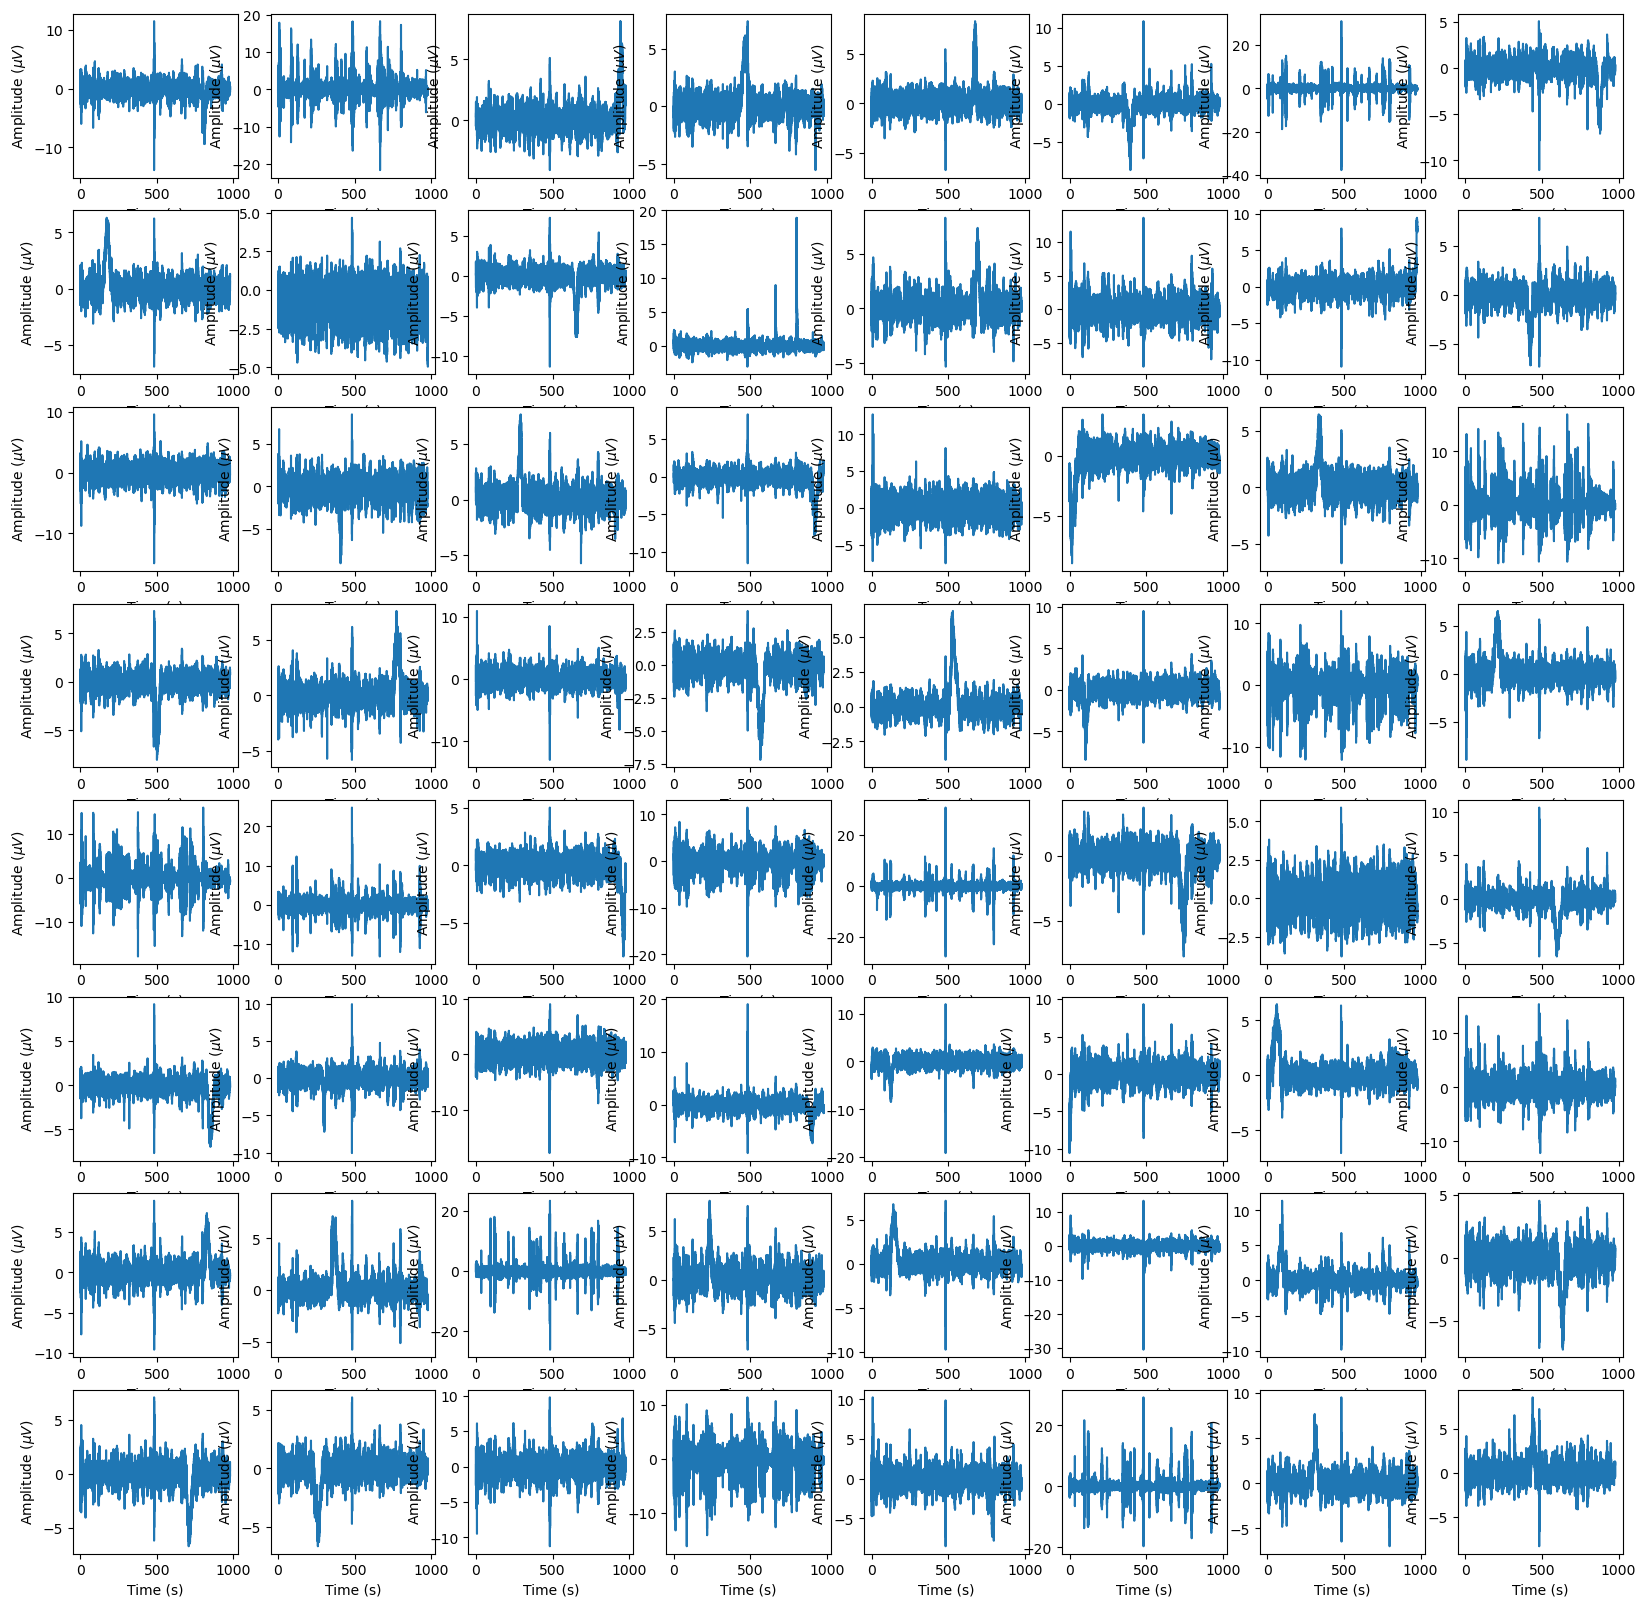

In [18]:
dataset.visualise_sample(2)

### Evaluation

We evaluate several models based on different feature extraction techniques

In [26]:
from src.evaluator import Evaluator
import pandas as pd
evaluator = Evaluator(dataset, N_experiments=3)
pd.DataFrame.from_dict(evaluator.get_evaluation())

6it [02:33, 25.54s/it]                       


audio size 600
eeg size 600
600
{'0': {'precision': 0.6065573770491803, 'recall': 0.5692307692307692, 'f1-score': 0.5873015873015873, 'support': 65.0}, '1': {'precision': 0.5172413793103449, 'recall': 0.5555555555555556, 'f1-score': 0.5357142857142857, 'support': 54.0}, 'accuracy': 0.5630252100840336, 'macro avg': {'precision': 0.5618993781797625, 'recall': 0.5623931623931624, 'f1-score': 0.5615079365079365, 'support': 119.0}, 'weighted avg': {'precision': 0.5660274284954231, 'recall': 0.5630252100840336, 'f1-score': 0.5638922235560891, 'support': 119.0}}
{'0': {'precision': 0.35802469135802467, 'recall': 0.4461538461538462, 'f1-score': 0.3972602739726027, 'support': 65.0}, '1': {'precision': 0.05263157894736842, 'recall': 0.037037037037037035, 'f1-score': 0.043478260869565216, 'support': 54.0}, 'accuracy': 0.2605042016806723, 'macro avg': {'precision': 0.20532813515269654, 'recall': 0.2415954415954416, 'f1-score': 0.22036926742108398, 'support': 119.0}, 'weighted avg': {'precision': 0

/home/bcca/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
0,rfc,0.563025
1,lr,0.260504
